<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/43_data_science_libs%5Chw05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа № 5
 Использование алгоритмов оптимизации для улучшения качества модели<br>
 1. Определение скорости обучения
Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском.

3. Сравнить разные алгоритмы оптимизации.

— На исходном наборе данных обучить модель логистической регрессии, используя разные оптимизаторы, и сравнить их эффективность.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report
from datetime import datetime

In [81]:
data = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/6051957/attachment/67593d42cfe4d368f976470e7c42e201.csv')
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


EDA

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Колонка Unnamed: 32  не содержит ни одного значения. Ее можно удалить.

In [83]:
data.drop(columns=['Unnamed: 32'], inplace=True)

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [85]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


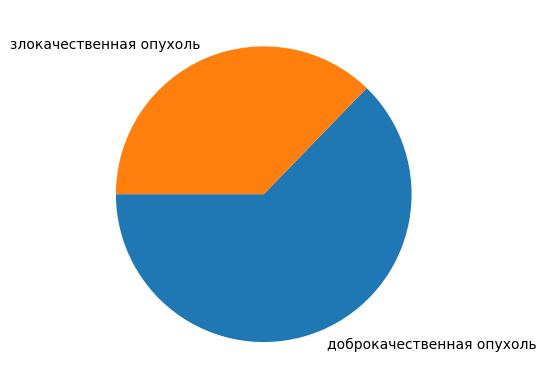

In [86]:
plt.pie(data['diagnosis'].value_counts(), labels=['доброкачественная опухоль', 'злокачественная опухоль'], startangle=180);

Заменим объекты B, M в датасете на 1, 0

In [87]:
data['diagnosis'] = data['diagnosis'].map({'B': 1, 'M': 0})

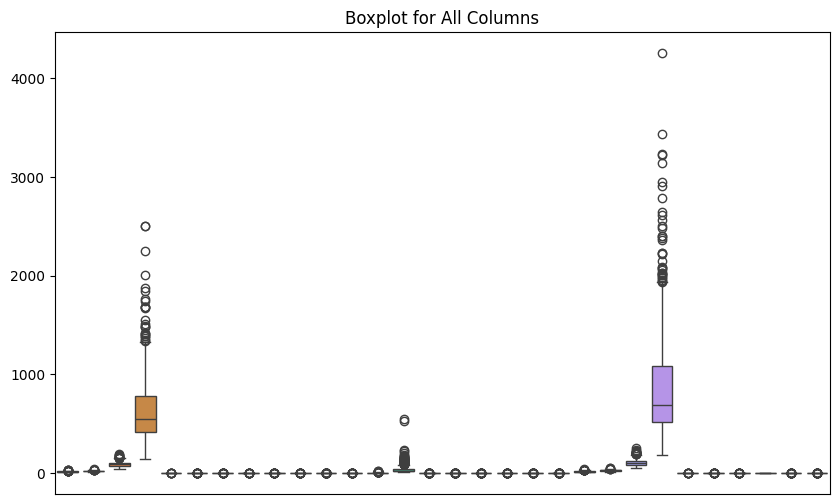

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['id', 'diagnosis']))
plt.xticks([])
plt.title("Boxplot for All Columns")
plt.show()

Быстрый анализ показывает, что в данных есть выбросы - это нужно будет учесть при подготовке данных

Подготовим данные

In [89]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучение модели

In [91]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
results = []

# eta0 - начальная скорость обучения
# Когда learning_rate='constant': eta0 остается постоянным в течение всего процесса обучения.
# tol = 1e-4 Обучение прекращается, если изменения функции потерь меньше 0.0001
for lr in learning_rates:
    start_time = datetime.now()
    model = SGDClassifier(
        loss='log_loss',
        learning_rate='constant',
        eta0=lr,
        max_iter=1000,
        tol=1e-4,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Learning Rate': lr,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Number of Iterations': model.n_iter_,
        'Elapsed': (datetime.now() - start_time).total_seconds()
    })
results_df = pd.DataFrame(results)
results_df

,Learning Rate,Accuracy,Precision,Recall,F1 Score,Number of Iterations,Elapsed
0,0.00001,0.973684,1.000000,0.957746,0.978417,856,0.082145
1,0.00010,0.991228,0.986111,1.000000,0.993007,520,0.053582
2,0.00100,0.991228,0.986111,1.000000,0.993007,35,0.012153
3,0.01000,0.964912,0.985507,0.957746,0.971429,15,0.010037
4,0.10000,0.973684,0.972222,0.985915,0.979021,13,0.010447
5,1.00000,0.885965,0.983333,0.830986,0.900763,15,0.010351
6,10.00000,0.973684,0.959459,1.000000,0.979310,10,0.009784


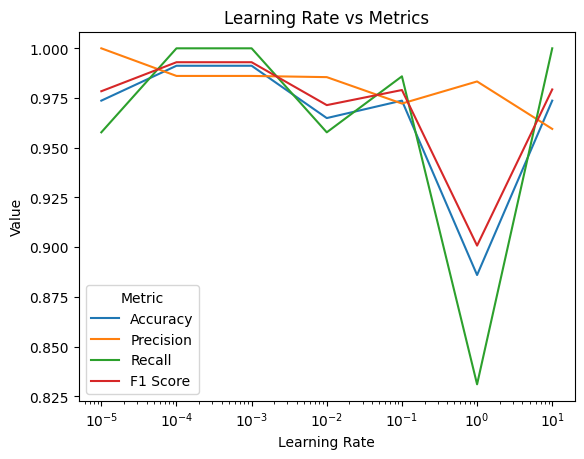

In [92]:
melted_df = results_df.melt(id_vars=['Learning Rate'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                            var_name='Metric', value_name='Value')

sns.lineplot(x='Learning Rate', y='Value', hue='Metric', data=melted_df)
plt.title('Learning Rate vs Metrics')
plt.xscale('log')
plt.show()

## Выводы: наблюдается тенденция к сниженю значений метрик по мере увеличения learning rate, что ожидаемо, поскольку при большем шаге обучения больше шансов "проскочить" искомый минимум

# Стохастический градиентный спуск

In [93]:
# Обучение модели с использованием SGD
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-4, random_state=42, eta0=0.001)
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

# Обучение модели с использованием стандартного градиентного спуска
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Iterations'],
    'SGD': [accuracy_sgd, precision_sgd, recall_sgd, f1_sgd, sgd_model.n_iter_],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr, 0]
}

results_df = pd.DataFrame(results)

In [94]:
results_df

,Metric,SGD,Logistic Regression
0,Accuracy,0.964912,0.982456
1,Precision,0.958904,0.985915
2,Recall,0.985915,0.985915
3,F1 Score,0.972222,0.985915
4,Iterations,33.000000,0.000000


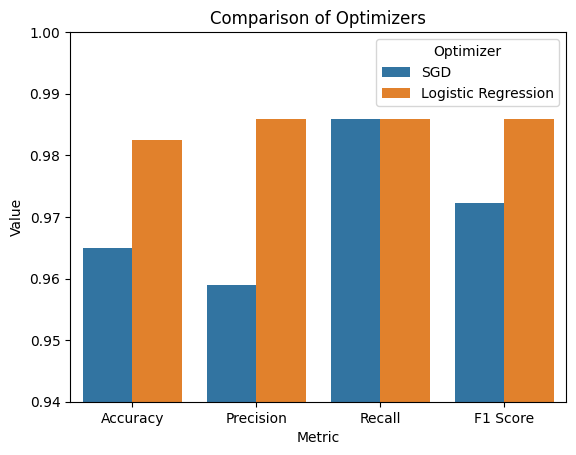

In [95]:
plot_data = results_df.query('Metric != "Iterations"')
results_long = plot_data.melt(id_vars='Metric', var_name='Optimizer', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Optimizer', data=results_long)
plt.title("Comparison of Optimizers")
plt.ylim(0.94, 1)
plt.show()

## Выводы: для имеющихся данных модель логистической регрессии (Logistic Regression) дает лучшие значения почти по всем метрикам.
В данном случае, выбирая между SGD и LR , мы должны выбрать LR

# Сравниваем разные алгоритмы оптимизации

In [96]:
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
results = []

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=10000, random_state=42)

    start_time = datetime.now()
    model.fit(X_train, y_train)
    end_time = datetime.now()

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    training_time = (end_time - start_time).total_seconds()

    results.append({
        'Solver': solver,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Elapsed': training_time
    })

results_df = pd.DataFrame(results)
results_df


,Solver,Accuracy,Precision,Recall,F1 Score,Elapsed
0,liblinear,0.991228,0.986111,1.000000,0.993007,0.005582
1,lbfgs,0.982456,0.985915,0.985915,0.985915,0.027616
2,newton-cg,0.982456,0.985915,0.985915,0.985915,0.009723
3,sag,0.991228,0.986111,1.000000,0.993007,0.541185
4,saga,0.991228,0.986111,1.000000,0.993007,0.686476


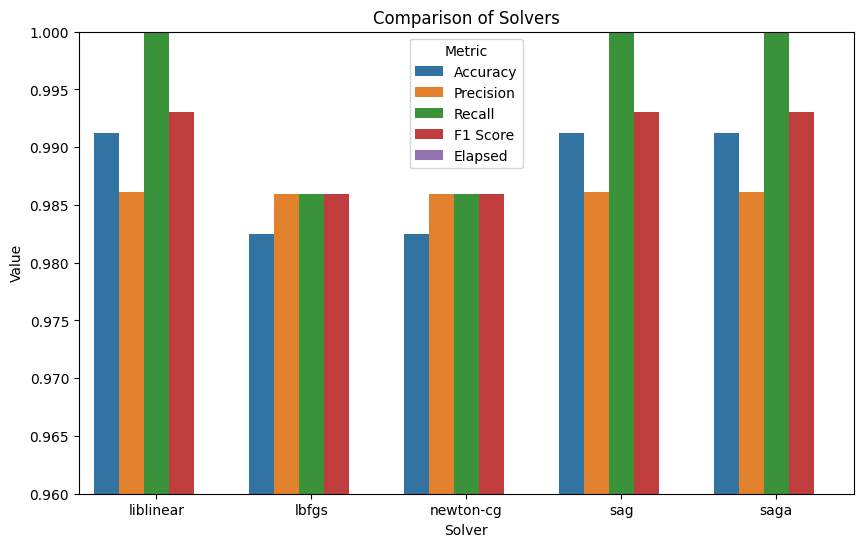

In [97]:
results_long = results_df.melt(id_vars='Solver', var_name='Metric', value_name='Value') # Use results_df directly and change var_name to 'Metric'
plt.figure(figsize=(10, 6))
sns.barplot(x='Solver', y='Value', hue='Metric', data=results_long) # Change hue to 'Metric'
plt.title("Comparison of Solvers")
plt.ylim(0.96, 1)
plt.show()

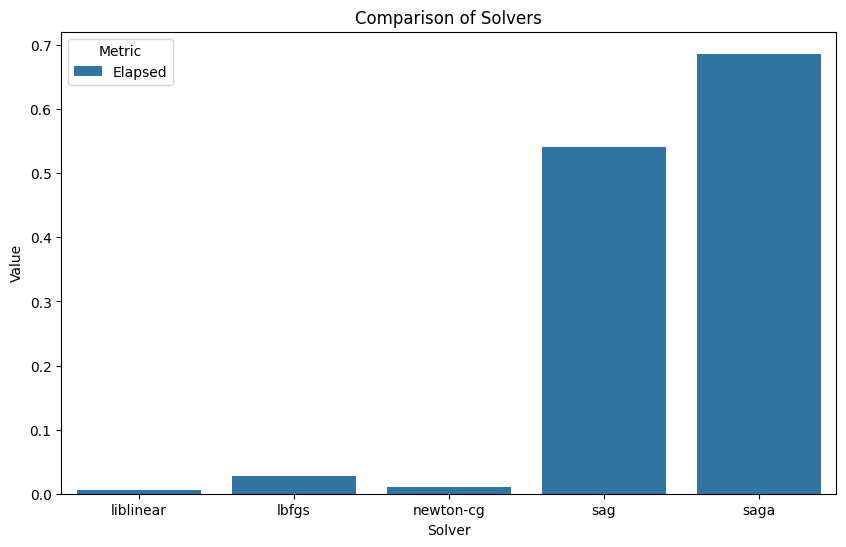

In [98]:
results_long = results_df[['Solver', 'Elapsed']].melt(id_vars='Solver', var_name='Metric', value_name='Value') # Use results_df directly and change var_name to 'Metric'
plt.figure(figsize=(10, 6))
sns.barplot(x='Solver', y='Value', hue='Metric', data=results_long) # Change hue to 'Metric'
plt.title("Comparison of Solvers")
# plt.ylim(0.96, 1)
plt.show()

## Выводы:
для имеющихся данных нам важнее всего метрика recall, поскольку мы должны избегать False Negative. <br>
Соответственно, нам подходят оптимизаторы liblinear, sag, saga <br>
Поскольку Значения метрик равны для всех трех, выбирать можно по наименьшему времени, потраченному на обучение: <br>
liblinear - наш выбор!